# 독립변수가 1개

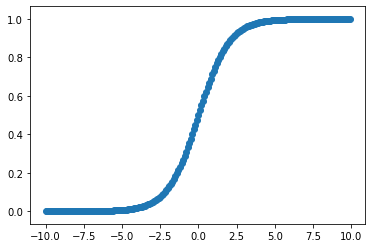

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# f(x) = 1 / ( 1 + e ** (-x))를 그려보자 
x = np.arange(-10,10,0.1)
y = 1 / ( 1 + np.exp(-x))
plt.scatter(x,y)

In [32]:
import tensorflow as tf

x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = W * x + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train= optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict = {x : x_data,
                                     y : y_data})

print(sess.run(H, feed_dict={x : 7}))

[0.7263343]


# 독립변수가 2개

In [34]:
import tensorflow as tf

x_data = [[1,1],
         [2,0],
         [5,1],
         [2,3],
         [3,3],
         [8,1],
        [10,0]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]

X = tf.placeholder(shape = [None,2], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([2,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit) 

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
        
        
result = sess.run(H, feed_dict = {X : [[7,1]]})
if result >= 0.5:
    print("시험에 통과했어요 : {}".format(result))
else:
    print(" 떨어졌어요 : {} ".format(result))
 

시험에 통과했어요 : [[0.9379511]]


# 독립변수가 3개

In [48]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [49]:
df = pd.read_csv("C:/Users/박소희/Desktop/machine-deep-learning/machine learning/data/admission.csv")
print(df.corr())

          admit       gre       gpa      rank
admit  1.000000  0.184434  0.178212 -0.242513
gre    0.184434  1.000000  0.384266 -0.123447
gpa    0.178212  0.384266  1.000000 -0.057461
rank  -0.242513 -0.123447 -0.057461  1.000000


In [50]:
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [51]:
# rank 역순으로 변경
def change_rank(k):
    if k == 4:
        return 1
    elif k == 3:
        return 2
    elif k == 2:
        return 3
    else:
        return 4
    
df["rank"] = df["rank"].apply(lambda x : change_rank(x))

{'whiskers': [<matplotlib.lines.Line2D at 0xdbd7af3f28>,
 'caps': [<matplotlib.lines.Line2D at 0xdbd7b02668>,
 'boxes': [<matplotlib.lines.Line2D at 0xdbd7af3dd8>],
 'medians': [<matplotlib.lines.Line2D at 0xdbd7b02cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0xdbd7b0c080>],
 'means': []}

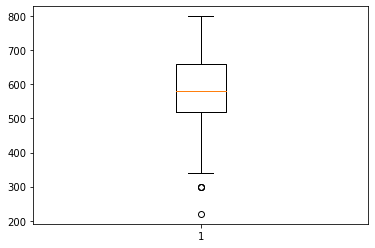

In [44]:
plt.boxplot(df['gre'])

{'whiskers': [<matplotlib.lines.Line2D at 0xdbd7b630f0>,
 'caps': [<matplotlib.lines.Line2D at 0xdbd7b637b8>,
 'boxes': [<matplotlib.lines.Line2D at 0xdbd7b56f60>],
 'medians': [<matplotlib.lines.Line2D at 0xdbd7b3ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0xdbd7b6b1d0>],
 'means': []}

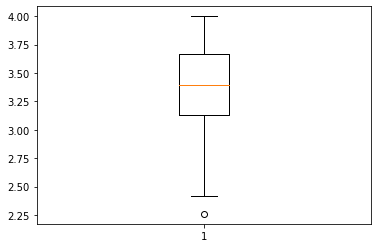

In [45]:
plt.boxplot(df['gpa'])

In [52]:
def process_outlier(tmp_df, tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    irq = q3-q1
    upper = q3 + irq * 1.5
    lower = q1 - irq * 1.5
    mask_upper = tmp > upper
    mask_lower = tmp < lower
    tmp_df = tmp_df.loc[~(mask_upper | mask_lower)]
    return tmp_df

df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])

In [54]:
# @ data set 설정 @
# 1 ) x_data
x_data = df[["gre","gpa","rank"]].values  
# => numpy array가 생성된다
# => value값이 너무 크기 때문에 학습이 어렵다
# => 최대최소값을 1,0으로 기준을 두고 0에서 1 사이 값으로 변환하여보자
x_data = MinMaxScaler().fit_transform(x_data)
# 2 ) y_data
y_data = df["admit"].values.reshape(-1,1)

X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([3,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data})

In [55]:
# @ prediction @
# H로 예측하면 결과가 True( H >= 0.5 ), False로 나온다
# 그래서 이를 숫자로 다시 바꿔줘야한다
predict = tf.cast( H >= 0.5, dtype = tf.float32)

# @ accuracy @
# 현재 test case가 없기 때문에 예측값과 주어진 데이터의 값이 같으면 True, 아니면 False
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                 feed_dict = {X: x_data,
                                              Y: y_data})))

정확도 : 0.703797459602356
